In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['outparquet', '.DS_Store', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'pyproject.toml', 'README.md', '.gitignore', 'print_parquet.py', 'outfiles', '.git', 'data', 'src']


In [2]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [3]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [4]:
vpt_axis = hist.axis.Regular(80, 0, 1000, name="pt", label="Z pT [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)  #LO and NLO categories
sample_axis = hist.axis.StrCategory([], name="name", growth=True)  #samples
order_axis = hist.axis.StrCategory([], name="order", growth=True)  #order

# My method without load samples

In [5]:
MAIN_DIR = "/Users/gbibim/Here/genZ"
dir_name = "data"
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": {
        "LO": [
            "Zto2Q-4Jets_HT-200to400",
            "Zto2Q-4Jets_HT-400to600",
            "Zto2Q-4Jets_HT-600to800",
            "Zto2Q-4Jets_HT-800",
        ],
        "NLO": [
            "Zto2Q-2Jets_PTQQ-100to200_1J",
            "Zto2Q-2Jets_PTQQ-100to200_2J",
            "Zto2Q-2Jets_PTQQ-200to400_1J",
            "Zto2Q-2Jets_PTQQ-200to400_2J",
            "Zto2Q-2Jets_PTQQ-400to600_1J",
            "Zto2Q-2Jets_PTQQ-400to600_2J",
            "Zto2Q-2Jets_PTQQ-600_1J",
            "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    },
    "Zto2Nu": {
        "LO": [
            "Zto2Nu-4Jets_HT-100to200",
            "Zto2Nu-4Jets_HT-200to400",
            "Zto2Nu-4Jets_HT-400to800",
            "Zto2Nu-4Jets_HT-800to1500",
        ],
        "NLO": [
            "Zto2Nu-2Jets_PTNuNu-100to200_1J",
            "Zto2Nu-2Jets_PTNuNu-100to200_2J",
            "Zto2Nu-2Jets_PTNuNu-200to400_1J",
            "Zto2Nu-2Jets_PTNuNu-200to400_2J",
            "Zto2Nu-2Jets_PTNuNu-400to600_1J",
            "Zto2Nu-2Jets_PTNuNu-400to600_2J",
            "Zto2Nu-2Jets_PTNuNu-600_1J",
            "Zto2Nu-2Jets_PTNuNu-600_2J",
        ],
    },
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("GenVPt", 1),
    # ("bbFatJetPNetTXbb", 2),
]

In [6]:
events_dict = {}

# Loop through Zto2Q and ZtoNuNu
for zto, orders in samples.items():
    events_dict[zto] = {}
    # Loop through LO and NLO
    for order, sample_list in orders.items():
        events_dict[zto][order] = {}
        for input_dir, dirs_samples in dirs.items():
            events_dict[zto][order] = {
                **events_dict[zto][order],
                **utils.load_samples(
                    input_dir,
                    sample_list,
                    year,
                    columns=utils.format_columns(load_columns),
                ),
            }

Loading Zto2Q-4Jets_HT-200to400
Loaded Zto2Q-4Jets_HT-200to400                           : 4273017 entries
Loading Zto2Q-4Jets_HT-400to600
Loaded Zto2Q-4Jets_HT-400to600                           : 3873904 entries
Loading Zto2Q-4Jets_HT-600to800
Loaded Zto2Q-4Jets_HT-600to800                           : 4111998 entries
Loading Zto2Q-4Jets_HT-800
Loaded Zto2Q-4Jets_HT-800                                : 4069506 entries
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 18998967 entries
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 18555240 entries
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 7929898 entries
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 20014819 entries
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 971914 entries
Loading Zto2Q-2

In [7]:
h_vpt = hist.Hist(vpt_axis, sample_axis)
#events = events_dict["Zto2Q"]["LO"]
for zto, orders in events_dict.items():
    for order, events in orders.items():
        for sample in events:
            weight = events[sample]["finalWeight"]
            vpt = events[sample]["GenVPt"][0]
            h_vpt.fill(vpt, sample, weight=weight)

In [16]:
h_vpt

Hist(
  Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'),
  StrCategory(['Zto2Q-4Jets_HT-200to400', 'Zto2Q-4Jets_HT-400to600', 'Zto2Q-4Jets_HT-600to800', 'Zto2Q-4Jets_HT-800', 'Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Zto2Nu-4Jets_HT-100to200', 'Zto2Nu-4Jets_HT-200to400', 'Zto2Nu-4Jets_HT-400to800', 'Zto2Nu-4Jets_HT-800to1500', 'Zto2Nu-2Jets_PTNuNu-100to200_1J', 'Zto2Nu-2Jets_PTNuNu-100to200_2J', 'Zto2Nu-2Jets_PTNuNu-200to400_1J', 'Zto2Nu-2Jets_PTNuNu-200to400_2J', 'Zto2Nu-2Jets_PTNuNu-400to600_1J', 'Zto2Nu-2Jets_PTNuNu-400to600_2J', 'Zto2Nu-2Jets_PTNuNu-600_1J', 'Zto2Nu-2Jets_PTNuNu-600_2J'], growth=True, name='name'),
  storage=Double()) # Sum: 44753170.41612659 (44878006.84909975 with flow)

In [8]:
def plot_h(hists, legend, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for hkey, h in hists.items():
        hep.histplot(h, ax=ax, label=legend[hkey], density=density)
    ax.legend(fontsize=10)
    ax.set_yscale("log")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [9]:
def plot_compare(hists, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for order in ("LO", "NLO"):
        h = hists[order]["sum"]
        hep.histplot(h, ax=ax, label=order, density=density)
    ax.legend(title=f"Pre-Selection")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
        ax.set_yscale("log")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [10]:
def kfactor(hists, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for zto in ("Zto2Q", "Zto2Nu"):
        h1 = hists[zto]["NLO"]["sum"]
        h2 = hists[zto]["LO"]["sum"]
        hep.histplot(h1/h2, ax=ax, label=f"{zto}")
    ax.legend()
    ax.set_yscale("log")
    ax.set_title(title)

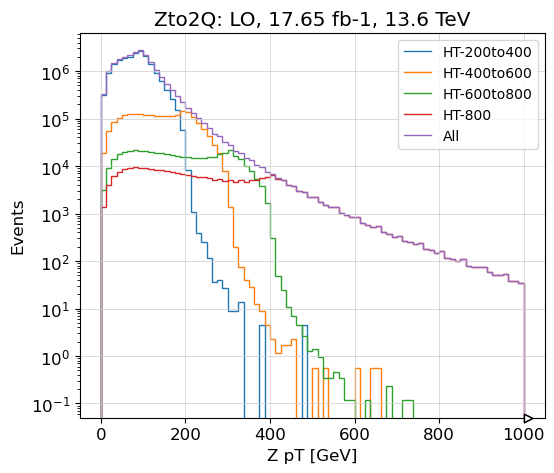

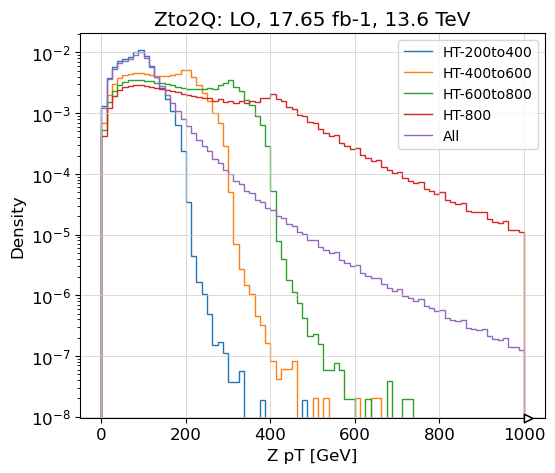

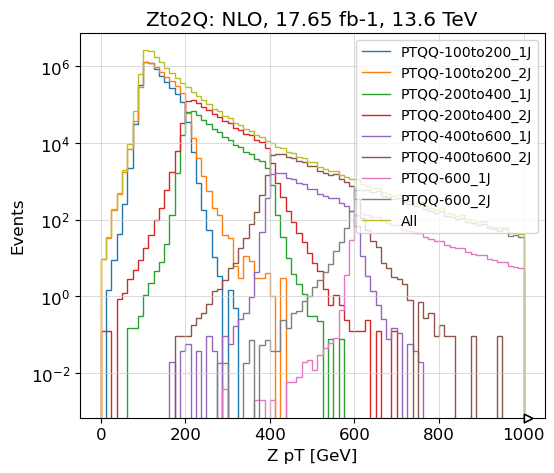

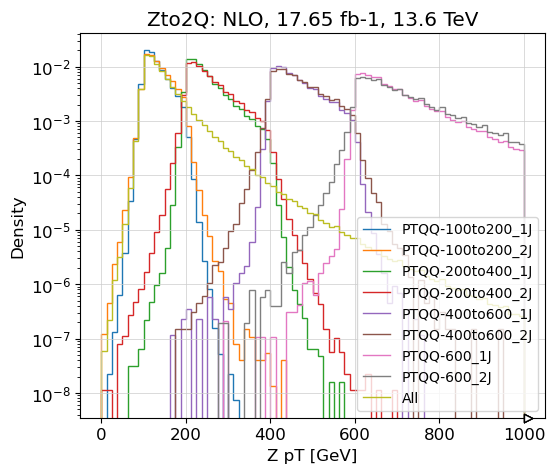

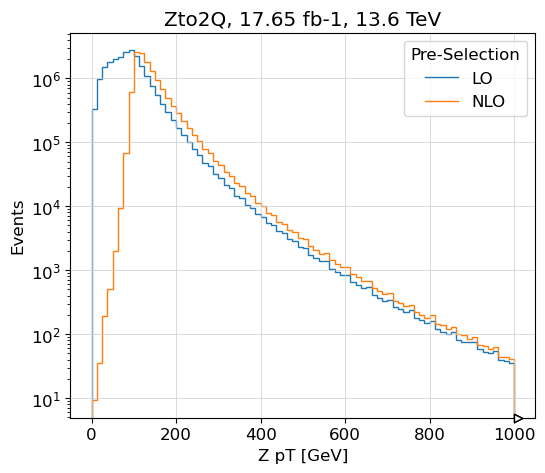

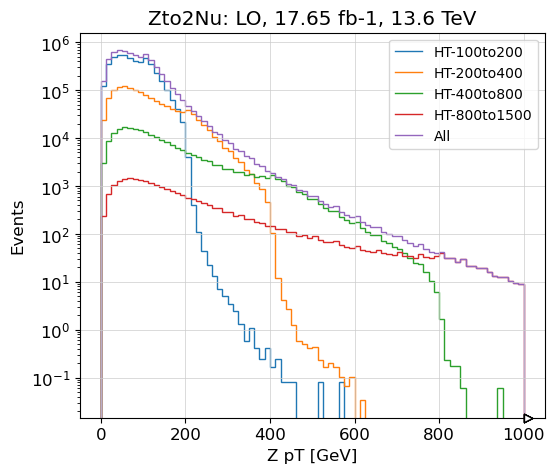

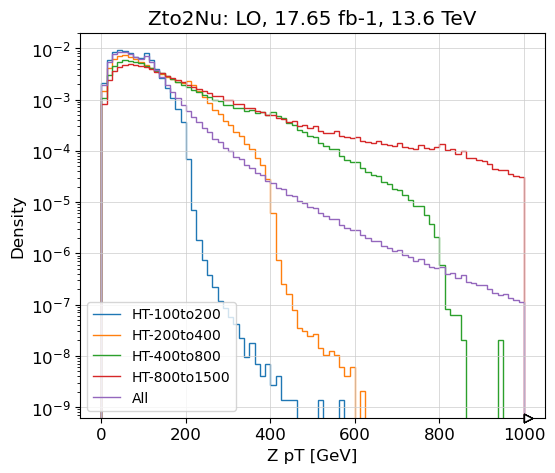

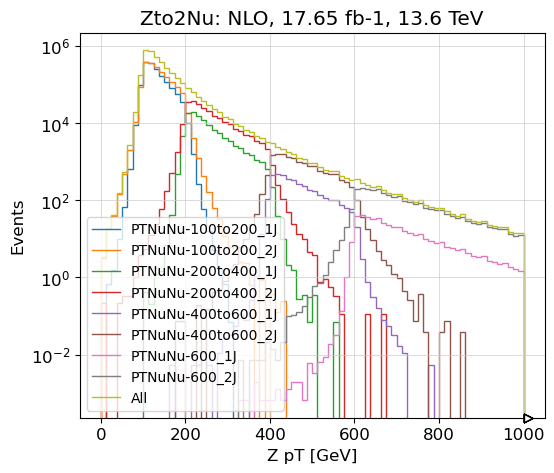

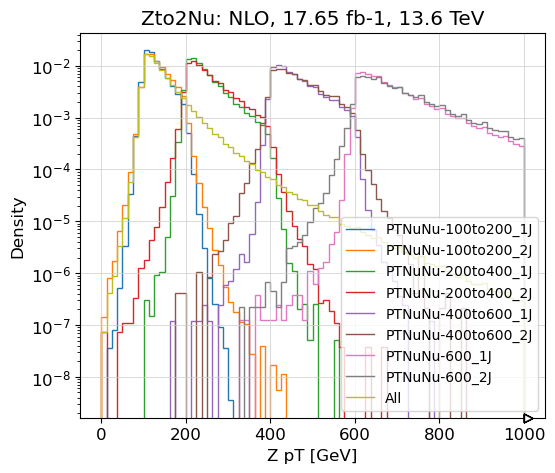

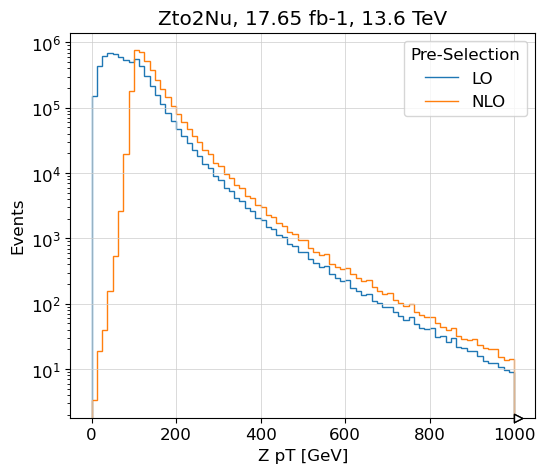

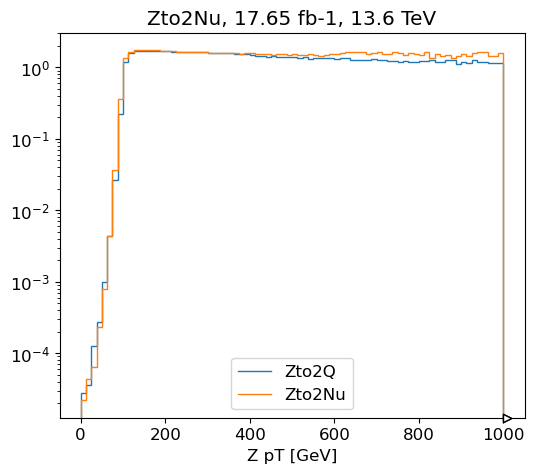

In [11]:
hists = {}
lumi = 17650/1000
energy = "13.6 TeV"
for zto, orders in events_dict.items():
    #zto = "Zto2Q" or "Zto2Nu"
    hists[zto] = {}
    for order, events in orders.items():
        #order = "LO" or "NLO"
        hists[zto][order] = {}
        legend = {}
        for sample in events:
            hists[zto][order][sample] = h_vpt[{"name": sample}]
            if (zto == "Zto2Q"):
                legend[sample]= sample[12:]
            else:
                legend[sample]= sample[13:]
            
        hists[zto][order]["sum"] = sum([h for h in hists[zto][order].values()])
        legend["sum"] = "All"
        
        plot_h(hists[zto][order], legend, density=False, title=f"{zto}: {order}, {lumi} fb-1, {energy}")
        plot_h(hists[zto][order], legend, density=True, title=f"{zto}: {order}, {lumi} fb-1, {energy}")
    plot_compare(hists[zto], density=False, title=f"{zto}, {lumi} fb-1, {energy}")

#fig, ax = plt.subplots(1, 1, figsize=(6, 5))
#for zto in ("Zto2Q", "Zto2Nu"):
#    h1 = hists[zto]["NLO"]["sum"]
#    h2 = hists[zto]["LO"]["sum"]
#    hep.histplot(h1/h2, ax=ax, label=f"{zto}")
#ax.legend()
#ax.set_yscale("log")
#ax.set_title(f"K factor, {lumi} fb-1, {energy}")
kfactor(hists, title=f"{zto}, {lumi} fb-1, {energy}")


